In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
from torchsummary import summary

import sys
sys.path.append('../src')
from model import *
from datagen import *

## Dataset

In [3]:
# Dataclass for adding problem

class Datamodel(Dataset):
    def __init__(self,time_pos_points,labels):
        self.x = time_pos_points
        self.y = labels
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [4]:
n_data = 2000
t_steps = 20

# data,labels = datagen_full_sum_normal(n_data,t_steps,normalize=True)
data,labels = datagen_circular(n_data,t_steps)
# data,labels = datagen_timewise_labels(n_data,t_steps,2)
# print(data[1],labels[1])

BATCH_SIZE = 64

training_data = Datamodel(data,labels)
training_loader = torch.utils.data.DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)

data.shape

print(labels[99])
print(data[99])

tensor([0.1264, 0.4238, 1.2074, 1.4373, 1.8254, 2.2979, 2.7328, 2.8742, 3.0779,
        3.4191, 3.6610, 3.9178, 4.1248, 4.7588, 4.9764, 5.0676, 5.4564, 5.8554,
        5.9747, 6.2832])
tensor([[0.0201],
        [0.0473],
        [0.1247],
        [0.0366],
        [0.0618],
        [0.0752],
        [0.0692],
        [0.0225],
        [0.0324],
        [0.0543],
        [0.0385],
        [0.0409],
        [0.0329],
        [0.1009],
        [0.0346],
        [0.0145],
        [0.0619],
        [0.0635],
        [0.0190],
        [0.0491]])


## Model training

100%|██████████| 90/90 [00:04<00:00, 18.56it/s]


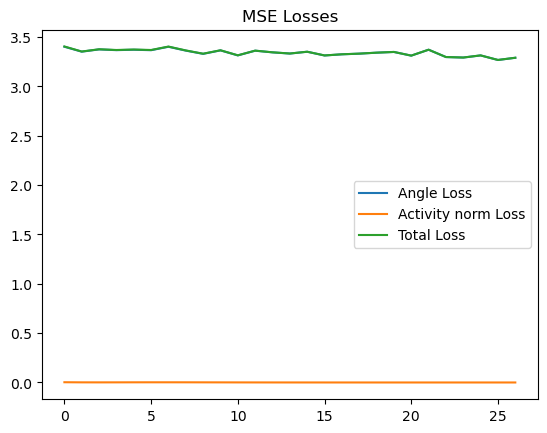

Guess on the first 15 training data:  tensor([[0.7729, 0.7739, 0.8106, 0.8297, 0.8417, 0.8825, 0.8855, 0.9005, 0.9070,
         0.9124, 0.9152, 0.9131, 0.9066, 0.9259, 0.9414, 0.9512, 0.9426, 0.9571,
         0.9772, 0.9836],
        [0.7741, 0.7808, 0.8289, 0.8325, 0.8364, 0.8617, 0.8815, 0.8940, 0.9083,
         0.9150, 0.9119, 0.9098, 0.9320, 0.9338, 0.9411, 0.9560, 0.9435, 0.9633,
         0.9673, 0.9837],
        [0.7839, 0.7909, 0.8177, 0.8282, 0.8393, 0.8655, 0.8616, 0.8798, 0.8730,
         0.8784, 0.8884, 0.9042, 0.9104, 0.9187, 0.9359, 0.9326, 0.9372, 0.9481,
         0.9653, 0.9830],
        [0.7858, 0.7895, 0.8097, 0.8218, 0.8447, 0.8739, 0.8803, 0.8957, 0.9146,
         0.9272, 0.9453, 0.9575, 0.9507, 0.9608, 0.9708, 0.9602, 0.9657, 0.9606,
         0.9650, 0.9843],
        [0.7999, 0.8099, 0.8489, 0.8638, 0.8791, 0.8909, 0.8874, 0.8876, 0.9102,
         0.9170, 0.9393, 0.9361, 0.9447, 0.9550, 0.9632, 0.9552, 0.9530, 0.9683,
         0.9775, 0.9847],
        [0.7779, 0.808

In [5]:
hidden_size = 2
input_size = 1
output_size = 1

train1 = True

if train1:
    # model2 = torch_RNN1(input_size,t_steps,output_size,hidden_size,lr=0.01,irnn=True,outputnn=False,Wx_normalize=True)
    # model1 = torch_RNN_full_manual(input_size,t_steps,output_size,hidden_size,lr=0.001,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    # model1 = RNN_L2(input_size,t_steps,output_size,hidden_size,lr=0.001,w_decay=0.000,act_decay=1000,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    # BIAS IS ON!
    model1 = RNN_circular(input_size,t_steps,output_size,hidden_size,lr=0.0001,w_decay=0.000,act_decay=0.01,irnn=True,outputnn=False,Wx_normalize=False,activation=False,rotation_init=False,bias=False)
    # print("Guess on the first 15 training data: ", model1(data[0:15]))
    _ = model1.train(training_loader,epochs=90)
    model1.plot_losses(average=30)
    # model1.plot_accs()
    print("Guess on the first 15 training data: ", model1(data[0:15]))
    # print("Weight of the hidden layer: ",model2.rnn.weight_hh_l0, " Weight of the input layer: ",model2.rnn.weight_ih_l0)

In [6]:
_ = model1.train(training_loader,epochs=1)

100%|██████████| 1/1 [00:00<00:00, 18.95it/s]


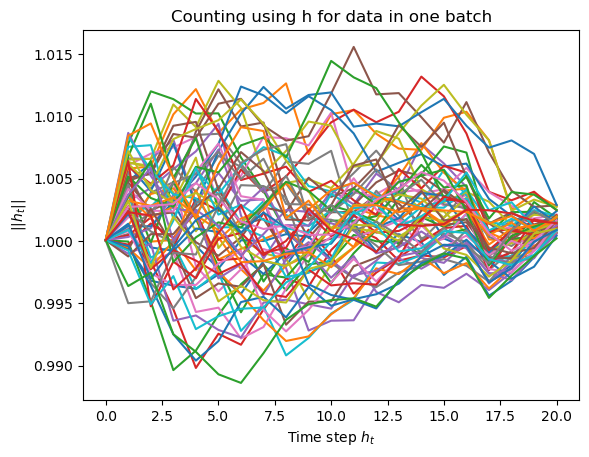

In [7]:
model1.hts.norm(dim=2).shape
htss = model1.hts.norm(dim=2)
plt.plot(htss.detach().numpy())
plt.title("Counting using h for data in one batch")
plt.xlabel(r"Time step $h_t$")
plt.ylabel(r"$||h_t||$")
plt.show()

torch.Size([21, 64, 2])


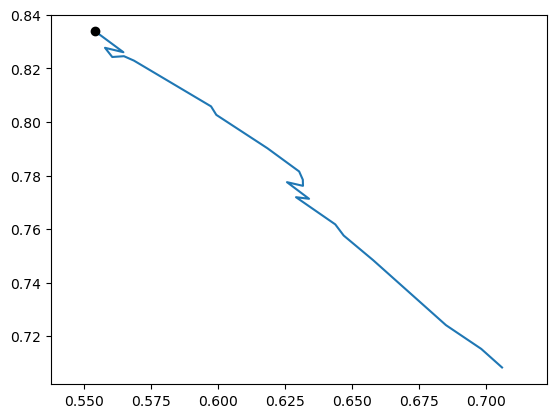

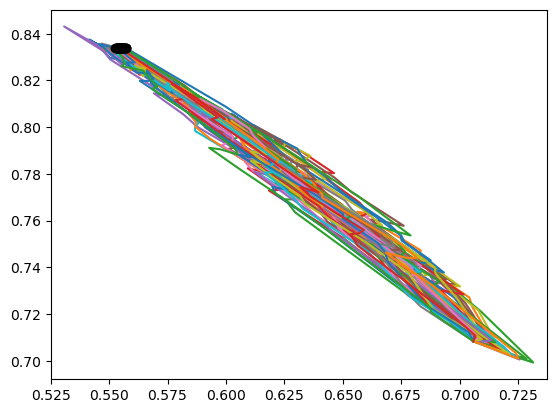

In [8]:
n = 0
print(model1.hts.shape)
model1.hts[:,n,:].shape
hts_cric = model1.hts.detach().numpy()
plt.plot(hts_cric[:,n,0],hts_cric[:,n,1],"-")
plt.plot(hts_cric[-1,n,0],hts_cric[-1,n,1],"o",color="black")
plt.axis("equal")
plt.show()
plt.plot(hts_cric[:,:,0],hts_cric[:,:,1],"-")
plt.plot(hts_cric[-1,:,0],hts_cric[-1,:,1],"o",color="black")
plt.axis("equal")
plt.show()

In [9]:
print(model1(data[10:11]))
print(data[10:11])
print(labels[10:11])

tensor([[0.7756, 0.7973, 0.8360, 0.8638, 0.8990, 0.9042, 0.9126, 0.9290, 0.9512,
         0.9673, 0.9688, 0.9702, 0.9779, 0.9840, 0.9814, 0.9618, 0.9589, 0.9733,
         0.9852, 0.9820]], grad_fn=<PermuteBackward0>)
tensor([[[0.0283],
         [0.0768],
         [0.0587],
         [0.0894],
         [0.1072],
         [0.0379],
         [0.0454],
         [0.0642],
         [0.0783],
         [0.0633],
         [0.0298],
         [0.0296],
         [0.0436],
         [0.0403],
         [0.0207],
         [0.0150],
         [0.0385],
         [0.0605],
         [0.0536],
         [0.0188]]])
tensor([[0.1781, 0.6609, 1.0298, 1.5916, 2.2654, 2.5035, 2.7889, 3.1923, 3.6846,
         4.0821, 4.2691, 4.4548, 4.7288, 4.9819, 5.1122, 5.2065, 5.4485, 5.8285,
         6.1653, 6.2832]])


In [10]:
((torch.abs(torch.sin(torch.tensor(2*np.pi))-torch.sin(torch.tensor(0))) + torch.abs(torch.cos(torch.tensor(2*np.pi))-torch.cos(torch.tensor(0))))**2).mean()

tensor(3.0571e-14)

[0.3896779 0.7492282 0.9332707 1.3880994 1.5360044 1.5869102 1.7521405
 1.9257835 2.2158976 2.6587927 2.8159044 3.110038  3.5588446 3.945929
 4.233602  4.7971516 5.1037803 5.352043  6.0113893 6.283185 ]


(-1.0994772911071777,
 1.0999751091003418,
 -1.096223771572113,
 1.0996841788291931)

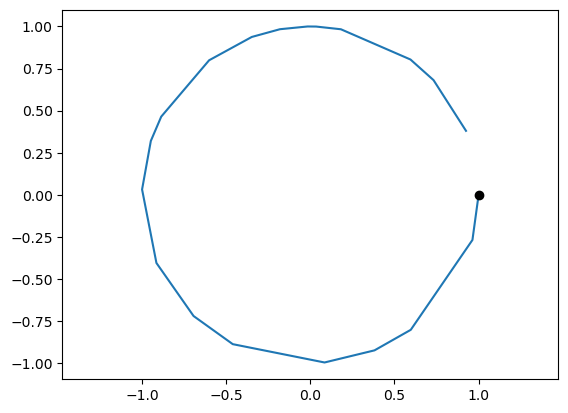

In [11]:
# Plot circle from data
data_raw = labels[91].detach().numpy()
print(data_raw)
data_points = np.zeros((t_steps,2))
for i in range(t_steps):
    data_points[i,0] = np.cos(data_raw[i])
    data_points[i,1] = np.sin(data_raw[i])


plt.plot(data_points[:,0],data_points[:,1],"-")
plt.plot(data_points[-1,0],data_points[-1,1],"o",color="black")
plt.axis("equal")

In [12]:
# print(model1.input.weight)
print(model1.hidden.weight)
print(model1.Wh_init)
# print(model1.output.weight)

Parameter containing:
tensor([[ 1.0082,  0.0080],
        [-0.0019,  0.9965]], requires_grad=True)
tensor([[1., 0.],
        [0., 1.]])


In [13]:
# hc = 0
# for h in model2.hts[0][0]:
#     hc += h

# np.linalg.norm(model2.hts[0,0].detach().numpy())
an1 = model1.hts[:,0,:]
an1 = an1.detach().numpy()
print(an1.shape)

for i in range(1,len(an1)):
    an1_i_normalized = an1[i]/np.linalg.norm(an1[i])
    an1_i_minus_1_normalized = an1[i-1]/np.linalg.norm(an1[i-1])
    # print(an1_i_normalized @ an1_i_minus_1_normalized)
    # Angle between an1[i] and an1[i-1]
    ang = np.arccos(an1_i_normalized @ an1_i_minus_1_normalized)
    print(np.rad2deg(ang))

(21, 2)
0.6632286
1.2448981
2.2208774
1.5911466
2.0138254
0.30001438
0.4805128
0.9385778
1.2738
0.92196035
0.08392937
0.08392937
0.43700722
0.3527702
0.15065785
1.1239613
0.16551098
0.82543105
0.68012536
0.18557489


In [14]:
# SVD of the weight matrix Wh

Wh = model1.hidden.weight.detach().numpy()
U, s, Vh = np.linalg.svd(Wh)
print("Singular values of Wh: ",s)

np.prod(s)
np.linalg.det(Wh)

Singular values of Wh:  [1.0090032 0.9957216]


1.0046862

Norm av input: 1.1238116633685538
Norm av Wh-skalert input 1.1311455109806807 ratio: 1.0065258689255316


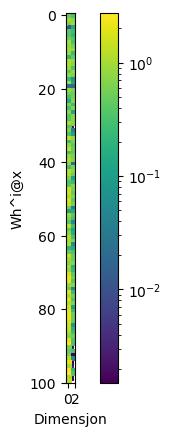

In [15]:
# Sjekker om Wh beholder normen til x 
x = np.random.uniform(size=hidden_size)
# x_const = np.ones((100,100))
x_const = np.random.uniform(size=(100,hidden_size))
print("Norm av input:", np.linalg.norm(x))
print("Norm av Wh-skalert input",np.linalg.norm(Wh @ x), "ratio:", np.linalg.norm(Wh @ x)/np.linalg.norm(x))
# Finner utviklingen av normen av Wh-skalert input
for i in range(1,100):
    Wx = model1.input.weight.detach().numpy()
    Wx_norm = np.linalg.norm(Wx)
    x_const[i] = np.linalg.matrix_power(Wh,i) @ x_const[i]
    # x_const[i] = np.linalg.matrix_power(Wh,i) @ Wx.squeeze()*x[i]
    # x_const[i] = Wx_norm**i* Wh**i @ x_const[i]
plt.imshow(x_const)
pcm = plt.pcolor(x_const, norm = "log")
plt.colorbar(pcm)
# plt.colorbar()
plt.xlabel("Dimensjon")
plt.ylabel("Wh^i@x")
plt.show()

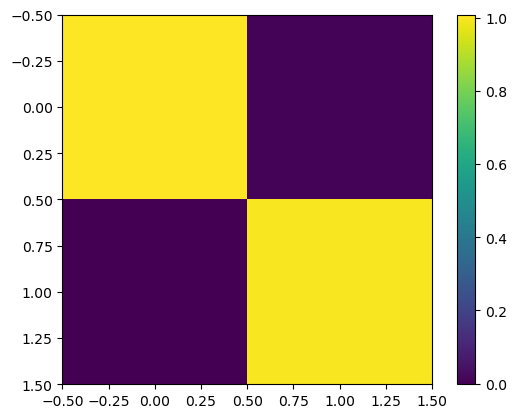

In [16]:
plt.imshow(Wh)
plt.colorbar()

In [17]:
Wx = model1.input.weight.detach().numpy()
print("Norm of Wx: ",np.linalg.norm(Wx))

Norm of Wx:  0.4402781


In [18]:
import numpy as np
from sklearn.decomposition import PCA

# PCA of the weight matrix Wh
print(model1.hts.squeeze().T.detach().numpy())

pca = PCA(n_components=3)
pca.fit(model1.hts.T.squeeze().detach().numpy())
print("PCA variance ratio: ",pca.explained_variance_ratio_) # Variance explained by each component, the bigger the more a dimension is important
print("PCA singular values: ",pca.singular_values_)
# print("PCA components: ",pca.components_)
# print("PCA mean: ",pca.mean_)
print("PCA noise: ", pca.noise_variance_)

[[0.70592105 0.7184102  0.699506   0.67021555 0.6471074  0.6171133
  0.61368245 0.6072993  0.59369653 0.57498914 0.5619094  0.56169224
  0.5614886  0.5558054  0.5513511  0.55439186 0.57151896 0.5726834
  0.5609299  0.5514347  0.5553018 ]
 [0.708372   0.7044047  0.7163378  0.74179435 0.7574824  0.7760113
  0.7800466  0.7854099  0.7943805  0.8061233  0.8152257  0.8174975
  0.8197386  0.8248604  0.8292265  0.8291134  0.8194696  0.81614155
  0.82439506 0.83148783 0.83148557]]


C:\Users\matti\AppData\Local\Temp\ipykernel_12796\1732132268.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3582.)
  pca.fit(model1.hts.T.squeeze().detach().numpy())


ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

In [32]:
hts = torch.tensor([0.0,-1.0])
x0 = torch.tensor([1.0,0.0])

torch.remainder(torch.acos(hts[0]/torch.linalg.norm(hts[:],dim=-1)),2*np.pi).T
torch.acos(hts[0]/torch.linalg.norm(hts[:],dim=-1))

tensor(1.5708)

In [34]:
hts = np.array([0.0,1.0])
x0 = np.array([1.0,0.0])

np.arccos(np.clip(np.dot(hts/np.linalg.norm(hts), x0), -1.0, 1.0))

1.5707963267948966